# Network Congestion

## Definition & Explanation:


Network congestion, also known as "logistical overloads," refers to situations when the volume of shipments surpasses the capacity of the logistics network (sorting centers, transport vehicles, distribution channels). This imbalance results in reduced efficiency, causing delays in processing, sorting, and delivering parcels.

During network congestion, resources such as vehicles, sorting infrastructure, staffing, and information systems become bottlenecks. Even minor disruptions can escalate quickly, extending overall delivery times significantly.

## Theoretical Framework

From a theoretical standpoint, logistical overload can be analyzed using queuing theory and network optimization models:

1. **Queuing Theory (Queueing Models)**

    Parcels are viewed as customers in a queue awaiting service (sorting, loading, transport). Logistical overload occurs when the "arrival rate" of parcels exceeds the "service rate," creating a backlog. Commonly modeled using distributions like the Poisson distribution (for arrivals) and Exponential distribution (for service times). Performance metrics include expected waiting time, queue length, and system utilization.

2. **Network Optimization Models (Supply Chain Management)**

    Models logistical systems as networks of nodes (distribution centers) and edges (transport routes).
    Overload is modeled as exceeding node capacities or bottlenecks along routes.
    Optimization methods (e.g., linear programming, simulation) assess capacity constraints and suggest system adjustments.

## Queuing Theory

Queuing theory is a branch of operations research that studies waiting lines or queues. It helps model scenarios where resources are limited, customers (or parcels, in logistics) arrive randomly, and service times vary. It's relevant for modeling logistical overload because it captures how congestion builds when arrival rates surpass handling capacities.

### Basic Elements in Queuing Theory:

- **Arrival Process**: Parcels entering the logistics system. Typically modeled using a **Poisson distribution** (random arrivals with an average rate **λ**).
- **Service Process**: Handling parcels (sorting, loading, transporting). Often modeled with an **Exponential distribution** (average service rate **μ**).
- **Queue**: Parcels waiting to be processed (delays occur here). Delays increase as arrival rates approach or exceed service capacities.
- **Servers**: Resources (vehicles, sorting stations, personnel) handling the parcels. When servers become fully utilized, overload happens, causing queues to lengthen.

### Commonly used Key Perfomance Metrics:

- Average waiting time in the queue (delay time).
- Queue length (number of parcels waiting).
- Utilization rate (percentage of capacity used).
- Probability of delays (chance that a parcel has to wait).

## M/M/1 Queue

M/M/1 Queue is a simple mmodel to illustrate logistical overload

M = Poisson arrivals (Markovian arrival process).

M = Exponentially distributed service times.

1 = Single server (or single resource).

This model gives insight into overload conditions through this formula:

**ρ=μ / λ​**

    ρ = System utilization (how busy the system is).

    λ = Arrival rate of parcels.

    μ = Service rate (capacity).

If ρ≥1ρ≥1 (arrival ≥ capacity), the queue grows indefinitely, meaning significant logistical overload.

Average Waiting Time: 2.70 hours
Average Queue Length: 16.21 parcels
System Utilization: 100.00%


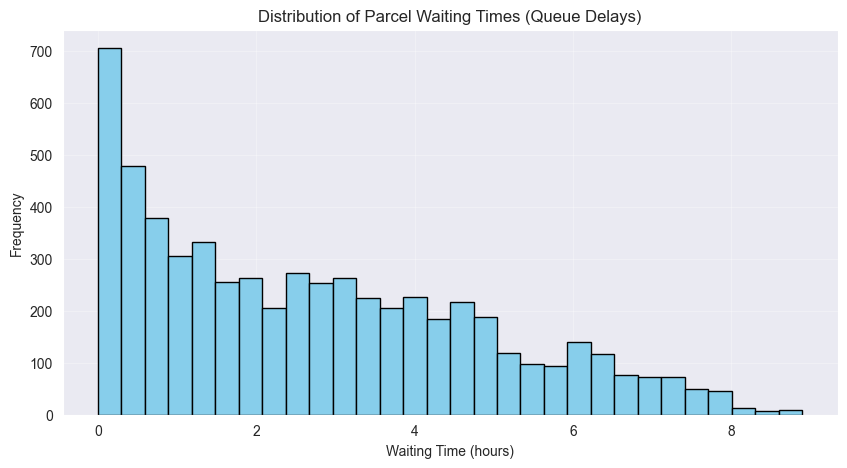

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
arrival_rate = 6      # Parcels per hour
service_rate = 6      # Parcels processed per hour
simulation_time = 1000  # Simulation duration in hours

# Simulate arrival and service times
inter_arrival_times = np.random.exponential(1/arrival_rate, int(arrival_rate*simulation_time*1.5))
arrival_times = np.cumsum(inter_arrival_times)
arrival_times = arrival_times[arrival_times <= simulation_time]

service_times = np.random.exponential(1/service_rate, len(arrival_times))

# Initialize arrays
start_service_times = np.zeros(len(arrival_times))
departure_times = np.zeros(len(arrival_times))
waiting_times = np.zeros(len(arrival_times))

# Run simulation
for i in range(len(arrival_times)):
    if i == 0:
        start_service_times[i] = arrival_times[i]
    else:
        start_service_times[i] = max(arrival_times[i], departure_times[i-1])
    waiting_times[i] = start_service_times[i] - arrival_times[i]
    departure_times[i] = start_service_times[i] + service_times[i]

# Compute average wait time and system metrics
average_waiting_time = np.mean(waiting_times)
average_queue_length = arrival_rate * average_waiting_time
utilization = arrival_rate / service_rate

# Results
print(f"Average Waiting Time: {average_waiting_time:.2f} hours")
print(f"Average Queue Length: {average_queue_length:.2f} parcels")
print(f"System Utilization: {utilization:.2%}")

# Plot waiting time distribution
plt.figure(figsize=(10, 5))
plt.hist(waiting_times, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Parcel Waiting Times (Queue Delays)')
plt.xlabel('Waiting Time (hours)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


 Explanation of the results:

   **Average Waiting Time**: How long parcels are typically delayed due to overload.

   **Queue Length**: Number of parcels typically waiting in the system.

   **Utilization**: Percentage of total system capacity used; >85–90% often signals overload risks.

Adjusting arrival_rate and service_rate lets you explore various overload scenarios:

   **arrival_rate** >= service_rate → permanent overload, infinite growth of queue.

   **arrival_rate** slightly below service_rate → temporary overloads, occasional significant delays.

   **arrival_rate** << service_rate → low utilization, minimal delays.